# Project Name: Salary Prediction From Scratch To Deployment


## Part 4 :  Model Building

In [5]:
## import libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [6]:
## Import dataset

df = pd.read_csv('Glassdoor_EDA.csv')

# choose relevant columns 
df.columns
df.head()

,Headquarter,Size,Founded,Type,Industry,Revenue,Employer,Job_Title,Basic_Pay,Avg_Pay,Rating,Positive,Negative,Neutral,Online,Campus,Refferal,City,Monthly
0,New York,1001 to 5000 Employees,21.0,Private,Consulting,$100 to $500 million (USD),Fractal,Data Scientist,1596545.0,1675000.0,4.0,72.0,19.0,9.0,48.0,20.0,15.0,Mumbai,No
1,India,1001 to 5000 Employees,42.0,Private,Real Estate,$10+ billion (USD),Housing.com,Data Scientist,2320161.0,2320161.0,4.2,54.0,25.0,21.0,31.0,31.0,15.0,Mumbai,No
2,Morocco,501 to 1000 Employees,8.0,Private,Consulting,$10+ billion (USD),Quantiphi,Data Scientist,965374.0,1017694.0,3.5,47.0,29.0,24.0,68.0,14.0,10.0,Mumbai,No
3,India,10000+ Employees,44.0,Public,Government Agencies,$10+ billion (USD),Reliance Industries,Data Scientist,1864862.0,1922877.0,3.8,77.0,8.0,15.0,60.0,14.0,9.0,Mumbai,No
4,India,5001 to 10000 Employees,11.0,Private,"Cable, Internet & Telephone Providers",$10+ billion (USD),Jio,Data Scientist,800000.0,800000.0,3.7,63.0,17.0,20.0,44.0,18.0,17.0,Mumbai,No


In [7]:
df.describe()

,Founded,Basic_Pay,Avg_Pay,Rating,Positive,Negative,Neutral,Online,Campus,Refferal
count,714.000000,7.140000e+02,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,39.449580,1.158198e+06,1.142504e+06,3.862132,63.946454,25.777293,20.723147,42.942368,21.658188,13.633166
std,48.461212,1.024792e+06,9.176172e+05,0.403069,14.512316,19.395020,13.066575,12.683042,6.053931,3.952144
min,1.000000,1.022200e+04,1.022200e+04,2.200000,13.000000,3.000000,3.000000,11.000000,7.000000,4.000000
25%,9.000000,4.532731e+05,4.532731e+05,3.600000,56.000000,13.000000,15.000000,34.000000,18.000000,11.000000
50%,22.000000,9.879825e+05,1.008918e+06,3.800000,64.000000,19.000000,19.000000,42.942368,21.658188,13.633166
75%,44.000000,1.559598e+06,1.536992e+06,4.100000,70.000000,31.750000,21.000000,49.000000,25.000000,15.000000
max,351.000000,1.098825e+07,7.392810e+06,5.000000,100.000000,100.000000,100.000000,100.000000,40.000000,25.000000


### Outlier Detection

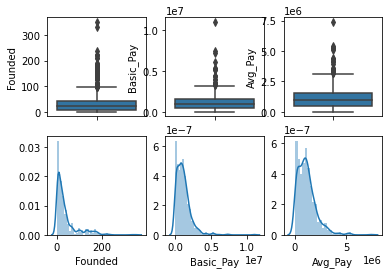

In [8]:
fig,axes=plt.subplots(2,3)
sns.boxplot(df.Founded,orient="v",ax=axes[0,0])
sns.boxplot(df.Basic_Pay,orient="v",ax=axes[0,1])
sns.boxplot(df.Avg_Pay,orient="v",ax=axes[0,2])

# fig,axes=plt.subplots(1,3)
sns.distplot(df.Founded,ax=axes[1,0])
sns.distplot(df.Basic_Pay,ax=axes[1,1])
sns.distplot(df.Avg_Pay,ax=axes[1,2])

In [9]:
df1=df.copy()

## Founded Column
df1["Founded_ZScore"]=(df1.Founded-df1.Founded.mean())/df1.Founded.std()
df2=df1[(df1.Founded_ZScore<3)]
df2.drop("Founded_ZScore",axis=1,inplace=True)

## Basic_Pay Column
df2["Basic_Pay_ZScore"]=(df2.Basic_Pay-df2.Basic_Pay.mean())/df2.Basic_Pay.std()
df3=df2[(df2.Basic_Pay_ZScore<3)]
df3.drop("Basic_Pay_ZScore",axis=1,inplace=True)

## Avg_Pay Column
df3["Avg_Pay_ZScore"]=(df3.Avg_Pay-df3.Avg_Pay.mean())/df3.Avg_Pay.std()
df4=df3[(df3.Avg_Pay_ZScore<3)]
df4.drop("Avg_Pay_ZScore",axis=1,inplace=True)
df=df4.copy()

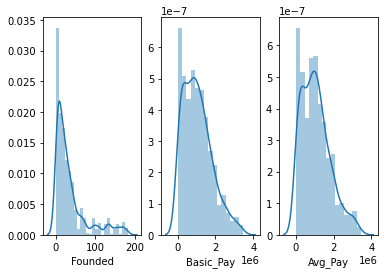

In [10]:
fig,axes=plt.subplots(1,3)
sns.distplot(df.Founded,ax=axes[0])
sns.distplot(df.Basic_Pay,ax=axes[1])
sns.distplot(df.Avg_Pay,ax=axes[2])

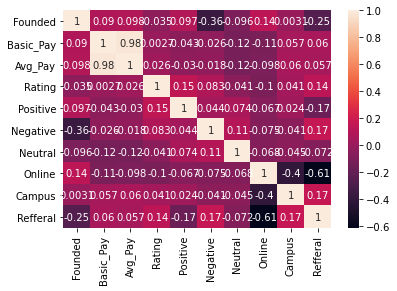

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
## select the relevent features for model building after many trails and using recursive feature elimitation techniuque 
df_model=df[["Size","Founded","Type","Industry","Revenue","Basic_Pay","Avg_Pay","Rating","Positive","Online","City"]]

### Label Encoding

In [13]:
## Label Encoding For Ordinal Categorical Features

Size_encoding=dict(zip(['1 to 50 Employees','51 to 200 Employees','201 to 500 Employees','501 to 1000 Employees',
            "1001 to 5000 Employees",'5001 to 10000 Employees','10000+ Employees'],[1,2,3,4,5,6,7]))
df_model.Size.replace(Size_encoding,inplace=True)

Revenue_encoding=dict(zip(['Less than $1 million (USD)','$1 to $5 million (USD)','$5 to $10 million (USD)','$10 to $25 million (USD)','$25 to $50 million (USD)',
 '$50 to $100 million (USD)','$100 to $500 million (USD)','$500 million to $1 billion (USD)','$1 to $2 billion (USD)',
 '$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)'],[1,2,3,4,5,6,7,8,9,10,11,12]))
df_model.Revenue.replace(Revenue_encoding,inplace=True)

df_model.Type.replace({"Private":1,"Public":0},inplace=True)

### One Hot Encoding

In [14]:
df_dum = pd.get_dummies(df_model)
df_dum.shape

(685, 26)

In [15]:
df_dum.head()

,Size,Founded,Type,Revenue,Basic_Pay,Avg_Pay,Rating,Positive,Online,Industry_Banking/Finance,...,Industry_Healthcare Medicine,Industry_Information Technology,Industry_Manufacturing,Industry_Outsource,Industry_Real Estate,Industry_Telecommunication/Television,Industry_Transportation,City_Banglore,City_Mumbai,City_Pune
0,5,21.0,1,7,1596545.0,1675000.0,4.0,72.0,48.0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,42.0,1,12,2320161.0,2320161.0,4.2,54.0,31.0,0,...,0,0,0,0,1,0,0,0,1,0
2,4,8.0,1,12,965374.0,1017694.0,3.5,47.0,68.0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,44.0,0,12,1864862.0,1922877.0,3.8,77.0,60.0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,11.0,1,12,800000.0,800000.0,3.7,63.0,44.0,0,...,0,0,0,0,0,0,0,0,1,0


### Train_Test_Split & Scaling

In [16]:
from sklearn.model_selection import train_test_split
X = df_dum.drop('Avg_Pay', axis =1)
y = df_dum.Avg_Pay.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
X.head()

,Size,Founded,Type,Revenue,Basic_Pay,Rating,Positive,Online,Industry_Banking/Finance,"Industry_Cable, Internet & Telephone Providers",...,Industry_Healthcare Medicine,Industry_Information Technology,Industry_Manufacturing,Industry_Outsource,Industry_Real Estate,Industry_Telecommunication/Television,Industry_Transportation,City_Banglore,City_Mumbai,City_Pune
0,5,21.0,1,7,1596545.0,4.0,72.0,48.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,42.0,1,12,2320161.0,4.2,54.0,31.0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,4,8.0,1,12,965374.0,3.5,47.0,68.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,44.0,0,12,1864862.0,3.8,77.0,60.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,11.0,1,12,800000.0,3.7,63.0,44.0,0,1,...,0,0,0,0,0,0,0,0,1,0


### OLS Regression(statsmodels)

In [14]:
import statsmodels.api as sm
X_sm = X1 = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     597.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:15:30   Log-Likelihood:                -9187.0
No. Observations:                 685   AIC:                         1.842e+04
Df Residuals:                     661   BIC:                         1.853e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                          -9.659e+04   5.97e+04     -1.618      0.106   -2.14e+05    2.06e+04
Size                                           -3524.5846   4812.685     -0.732      0.464    -1.3e+04    5925.407
Founded                                          294.6084    216.203      1.363      0.173    -129.919     719.136
Type                                             599.3906   1.72e+04      0.035      0.972   -3.32e+04    3.44e+04
Revenue                                          965.5019   2703.423      0.357      0.721   -4342.829    6273.833
Basic_Pay                                          0.9772      0.009    111.807      0.000       0.960       0.994
Rating                                          3.999e+04   1.62e+04      2.464      0.014    8121.349    7.19e+04
Positive                                         416.4228    455.901      0.913      0.361    -478.766    1311.612
Online                                            56.2927    541.623      0.104      0.917   -1007.217    1119.803
Industry_Banking/Finance                       -5.444e+04   2.23e+04     -2.445      0.015   -9.81e+04   -1.07e+04
Industry_Cable, Internet & Telephone Providers  6697.0360   7.86e+04      0.085      0.932   -1.48e+05    1.61e+05
Industry_Consulting                            -1.485e+04   2.43e+04     -0.611      0.541   -6.26e+04    3.29e+04
Industry_Education                             -1.052e+04   5.12e+04     -0.206      0.837   -1.11e+05    8.99e+04
Industry_Film Production & Distribution         5.333e+04   7.92e+04      0.674      0.501   -1.02e+05    2.09e+05
Industry_General Merchandise & Superstores      2.063e+05   9.18e+04      2.248      0.025    2.61e+04    3.87e+05
Industry_Government Agencies                   -2.074e+04    3.4e+04     -0.611      0.542   -8.74e+04    4.59e+04
Industry_Healthcare Medicine                   -4.668e+04    3.8e+04     -1.229      0.220   -1.21e+05    2.79e+04
Industry_Information Technology                -3.284e+04   1.68e+04     -1.956      0.051   -6.58e+04     129.146
Industry_Manufacturing                         -2.983e+04   2.75e+04     -1.085      0.278   -8.38e+04    2.42e+04
Industry_Outsource                             -9754.0508   3.63e+04     -0.268      0.788   -8.11e+04    6.16e+04
Industry_Real Estate                           -3.852e+04   7.86e+04     -0.490      0.624   -1.93e+05    1.16e+05
Industry_Telecommunication/Television          -3.895e+04   5.13e+04     -0.760      0.448    -1.4e+05    6.17e+04
Industry_Transportation                        -6.581e+04   4.16e+04     -1.581      0.114   -1.48e+05    1.59e+04
City_Banglore                                  -1.541e+04   2.15e+04     -0.718      0.473   

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
print("Training Score =>", linear_reg.score(X_train,y_train))
print("Testing Score  =>",linear_reg.score(X_test,y_test))
MAE=np.mean(cross_val_score(linear_reg,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))
print("Training neg_mean_absolute_error =>",MAE)

MAE1=np.mean(cross_val_score(linear_reg,X_test,y_test, scoring = 'neg_mean_absolute_error', cv= 5))
print("Testing neg_mean_absolute_error =>",MAE1)

Training Score => 0.9483263164034806
Testing Score  => 0.9747837340519931
Training neg_mean_absolute_error => -73374.03850573851
Testing neg_mean_absolute_error => -1.1837835139793493e+17


### Lasso regression 

In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.13)
lasso_reg.fit(X_train,y_train)
print("Training Score =>", lasso_reg.score(X_train,y_train))
print("Testing Score  =>",lasso_reg.score(X_test,y_test))
MAE=np.mean(cross_val_score(lasso_reg,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))
print("Training neg_mean_absolute_error =>",MAE)

MAE1=np.mean(cross_val_score(lasso_reg,X_test,y_test, scoring = 'neg_mean_absolute_error', cv= 5))
print("Testing neg_mean_absolute_error =>",MAE1)

Training Score => 0.9483263164024092
Testing Score  => 0.974783805280125
Training neg_mean_absolute_error => -73445.90630194223
Testing neg_mean_absolute_error => -73692.25097303579


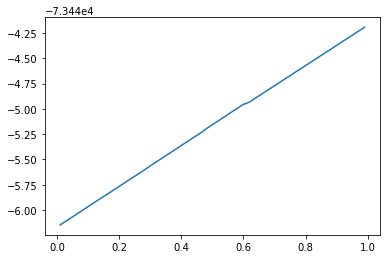

In [17]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lasso_reg = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lasso_reg,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))
    
plt.plot(alpha,error)

In [18]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-73444.192242


In [19]:
# Tuned lasso regression 
lasso_reg = Lasso(alpha=.99)
lasso_reg.fit(X_train,y_train)
print("Training Score =>", lasso_reg.score(X_train,y_train))
print("Testing Score  =>",lasso_reg.score(X_test,y_test))
MAE=np.mean(cross_val_score(lasso_reg,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))
print("Training neg_mean_absolute_error =>",MAE)

MAE1=np.mean(cross_val_score(lasso_reg,X_test,y_test, scoring = 'neg_mean_absolute_error', cv= 5))
print("Testing neg_mean_absolute_error =>",MAE1)

Training Score => 0.9483263163413428
Testing Score  => 0.9747842764190575
Training neg_mean_absolute_error => -73444.1922415292
Testing neg_mean_absolute_error => -73703.57966846217


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rand_for = RandomForestRegressor()
rand_for.fit(X_train,y_train)
print("Training Score =>", rand_for.score(X_train,y_train))
print("Testing Score  =>",rand_for.score(X_test,y_test))

MAE_train=np.mean(cross_val_score(rand_for,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))
print("Training neg_mean_absolute_error =>",MAE_train)

MAE_test=np.mean(cross_val_score(rand_for,X_test,y_test, scoring = 'neg_mean_absolute_error', cv= 5))
print("Testing neg_mean_absolute_error =>",MAE_test)

Training Score => 0.9919473415466253
Testing Score  => 0.971121242947973
Training neg_mean_absolute_error => -78670.16297529606
Testing neg_mean_absolute_error => -83535.6472537037


In [21]:
## Tunning Of Random Forest

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,500,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
tune_rand_for = GridSearchCV(rand_for,parameters,scoring='neg_mean_absolute_error',cv=5)
tune_rand_for.fit(X_train,y_train)
tune_rand_for.best_score_
print(tune_rand_for.best_estimator_)

RandomForestRegressor(n_estimators=150)


### Tuned RandomForestRegressor

In [22]:
print("Training Score=>",tune_rand_for.best_estimator_.score(X_train,y_train))
print("Testing Score =>",tune_rand_for.best_estimator_.score(X_test,y_test))

MAE_train=np.mean(cross_val_score(tune_rand_for.best_estimator_,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))
print("training neg_mean_absolute_error =>",MAE_train)

MAE_test=np.mean(cross_val_score(tune_rand_for.best_estimator_,X_test,y_test, scoring = 'neg_mean_absolute_error', cv= 5))
print("Testing neg_mean_absolute_error =>",MAE_test)


Training Score=> 0.9918006851207064
Testing Score => 0.9704436203535548
training neg_mean_absolute_error => -77569.86553004172
Testing neg_mean_absolute_error => -81149.04383851853


### ExtraTreesRegressor

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

Extra_Tree = ExtraTreesRegressor(n_estimators=300,min_samples_split=8, random_state=0).fit(X_train, y_train)

print("Training Score",Extra_Tree.score(X_train,y_train))
print("Testing Score",Extra_Tree.score(X_test,y_test))

MAE_train=np.mean(cross_val_score(Extra_Tree,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))
print("neg_mean_absolute_error =>",MAE_train)

MAE_test=np.mean(cross_val_score(Extra_Tree,X_test,y_test, scoring = 'neg_mean_absolute_error', cv= 5))
print("neg_mean_absolute_error =>",MAE_test)

Training Score 0.9834400206174383
Testing Score 0.9705986500083562
neg_mean_absolute_error => -78016.52435151875
neg_mean_absolute_error => -70643.18567127948


### Mean Absolute Error

In [24]:
from sklearn.metrics import mean_absolute_error

y_pred_LR=linear_reg.predict(X_test)
y_pred_ls=lasso_reg.predict(X_test)
y_pred_RF=tune_rand_for.best_estimator_.predict(X_test)
y_pred_ExTr=Extra_Tree.predict(X_test)

print("Linear Reg   =>",mean_absolute_error(y_test,y_pred_LR))
print("Lasso Reg    =>", mean_absolute_error(y_test,y_pred_ls))
print("random Forest=>",mean_absolute_error(y_test,y_pred_RF))
print("Extra Tree   =>",mean_absolute_error(y_test,y_pred_ExTr))

Linear Reg   => 67342.64891502185
Lasso Reg    => 67339.91706031318
random Forest=> 59280.83981119223
Extra Tree   => 62340.91419532745


In [37]:
import pickle
pickle.dump(tune_rand_for.best_estimator_.predict,open("model3.pkl","wb"))
model=pickle.load(open("model2.pkl","rb"))

In [38]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.9747842764190575

===Residual Plot===


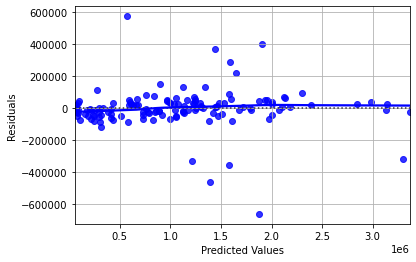

In [40]:
print("===Residual Plot===")
Resd=y_test-y_pred
import numpy as np
import seaborn as sns
# Plot the residuals after fitting a linear model
sns.residplot(x=y_pred, y=Resd, lowess=True, color="b")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [32]:
print("===Compare the performance of various models===")

result=pd.DataFrame({"Linear Regression":[0.95,0.97,-73374.04,-1.18E+17,67342.65],
                    "Lasso Regression":[0.95,0.97,-73444.19,-73703.58,67339.92],
                    "Random Forest":[0.99,0.97,-78415.48,-79952.92,59391.69],
                    "Extra Tress Regressor":[0.98,0.97,-78465.43,-70819.80,62112.87]})
result.index = ["R Sqaure Training","R Sqaure Testing","NMAE Training","NMAE Testing","MAE"]
pd.set_option('display.float_format', lambda x: '%.5f' % x)
result

===Compare the performance of various models===


,Linear Regression,Lasso Regression,Random Forest,Extra Tress Regressor
R Sqaure Training,0.95000,0.95000,0.99000,0.98000
R Sqaure Testing,0.97000,0.97000,0.97000,0.97000
NMAE Training,-73374.04000,-73444.19000,-78415.48000,-78465.43000
NMAE Testing,-118000000000000000.00000,-73703.58000,-79952.92000,-70819.80000
MAE,67342.65000,67339.92000,59391.69000,62112.87000
